# **Importing required modules**

In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt

# **General functions for plotting**

In [21]:
def configure_coordinates(points):
  x_coordinates = []
  y_coordinates = []

  for point in points:
    x_coordinates.append(point[0])
    y_coordinates.append(point[1])

  x_coordinates.append(points[0][0])
  y_coordinates.append(points[0][1])

  return [x_coordinates, y_coordinates]

In [24]:
def plot_2d_shape(points_1, points_2 = [], x_limit = [0, 40], y_limit = [0, 40], color_1 = "blue", color_2 = "red"):
  x_coordinates_1, y_coordinates_1 = configure_coordinates(points_1)

  plt.xlim(x_limit)
  plt.ylim(y_limit)

  plt.plot(x_coordinates_1, y_coordinates_1, marker = "o", color = color_1)

  if points_2:
     x_coordinates_2, y_coordinates_2 = configure_coordinates(points_2)
     plt.plot(x_coordinates_2, y_coordinates_2, marker = "o", color = color_2)

  plt.grid()
  plt.show()

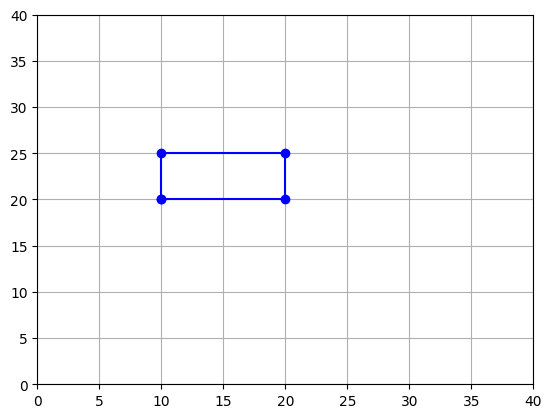

In [25]:
points = [[10, 20], [20, 20], [20, 25], [10, 25]]
plot_2d_shape(points)

In [26]:
# Format of parameter "x_coordinates": [x_start, x_end]
# Format of parameter "y_coordinates": [y_start, y_end]
def plot_line(x_coordinates, y_coordinates, x_limit = [-40, 40], y_limit = [-40, 40]):
  plt.xlim(x_limit)
  plt.ylim(y_limit)

  plt.plot(x_coordinates, y_coordinates, marker = "o", color = "black")

  plt.grid()
  plt.show()

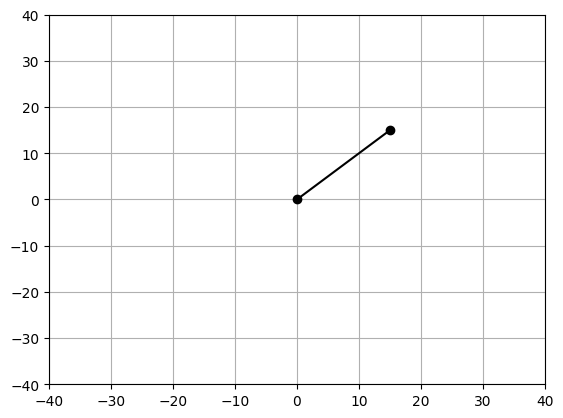

In [27]:
x_coordinates = [0, 15]
y_coordinates = [0, 15]

plot_line(x_coordinates, y_coordinates)

# **Translation**

In [28]:
def translate_point(x, y, x_translation, y_translation):
  translation_matrix = np.array([[1, 0, x_translation], [0, 1, y_translation], [0, 0, 1]])
  point_vector = np.array([x, y, 1])
  translated_point_vector = translation_matrix @ point_vector
  return translated_point_vector

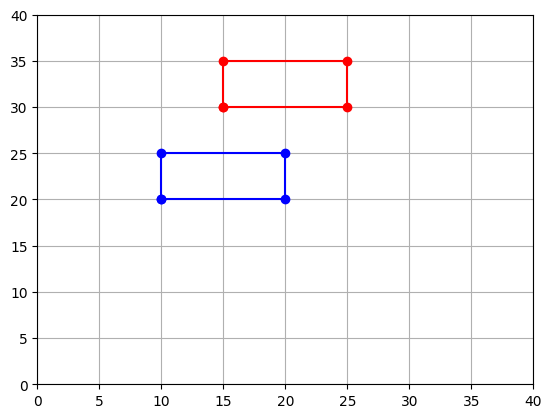

In [29]:
x_translation = 5
y_translation = 10

translated_points = []

for point in points:
  translated_points.append(translate_point(point[0], point[1], x_translation, y_translation))

plot_2d_shape(points, translated_points)

# **Rotation**

## **Rotation about the Origin**

In [30]:
# This method rotates point around coordinate system origin.
def rotate_point(x, y, rotation_angle):
  rotation_matrix = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle), 0], [np.sin(rotation_angle), np.cos(rotation_angle), 0], [0, 0, 1]])
  point_vector = np.array([x, y, 1])
  rotated_point_vector = rotation_matrix @ point_vector
  return rotated_point_vector

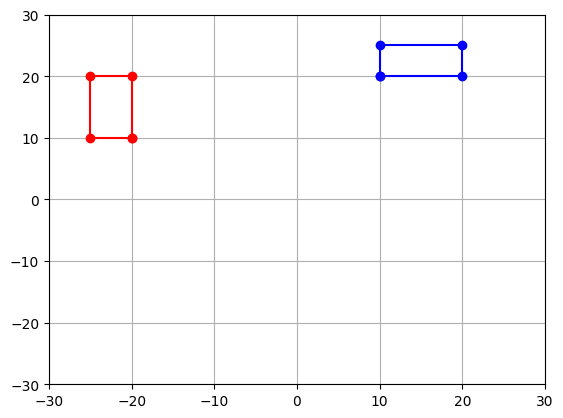

In [31]:
rotation_angle = math.pi / 2
rotated_points = []

for point in points:
  rotated_points.append(rotate_point(point[0], point[1], rotation_angle))

plot_2d_shape(points, rotated_points, [-30, 30], [-30, 30])

## **Rotation about the custom point**

In [34]:
# This method rotates point around custom point.
def rotate_point_custom(x, y, x_rotation, y_rotation, rotation_angle):
  translated_point = translate_point(point[0], point[1], -x_rotation, -y_rotation)
  rotated_point = rotate_point(translated_point[0], translated_point[1], rotation_angle)
  return translate_point(rotated_point[0], rotated_point[1], x_rotation, y_rotation)

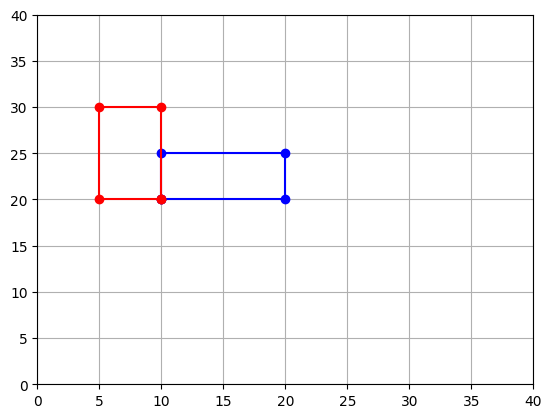

In [35]:
rotation_point = [10, 20]
rotation_angle = math.pi / 2

custom_rotated_points = []

for point in points:
  custom_rotated_points.append(rotate_point_custom(point[0], point[1], rotation_point[0], rotation_point[1], rotation_angle))

plot_2d_shape(points, custom_rotated_points)

# **Shearing**

## **Shearing in the X-direction**

In [36]:
def shear_in_x_direction(x, y, shearing_coefficient):
  shearing_matrix = np.array([[1, shearing_coefficient, 0], [0, 1, 0], [0, 0, 1]])
  point_vector = np.array([x, y, 1])
  sheared_point_vector = shearing_matrix @ point_vector
  return sheared_point_vector

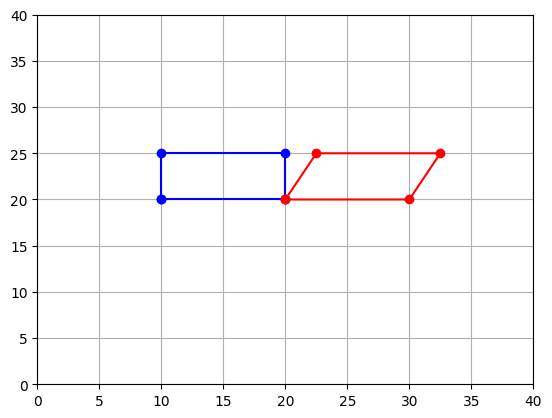

In [37]:
shearing_coefficient = 0.5

sheared_points = []

for point in points:
  sheared_points.append(shear_in_x_direction(point[0], point[1], shearing_coefficient))

plot_2d_shape(points, sheared_points)

## **Shearing in the Y-direction**

In [38]:
def shear_in_y_direction(x, y, shearing_coefficient):
  shearing_matrix = np.array([[1, 0, 0], [shearing_coefficient, 1, 0], [0, 0, 1]])
  point_vector = np.array([x, y, 1])
  sheared_point_vector = shearing_matrix @ point_vector
  return sheared_point_vector

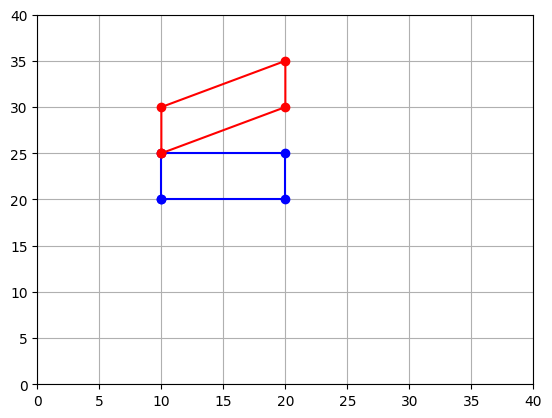

In [39]:
shearing_coefficient = 0.5

sheared_points = []

for point in points:
  sheared_points.append(shear_in_y_direction(point[0], point[1], shearing_coefficient))

plot_2d_shape(points, sheared_points)

# **Scaling**

In [40]:
def scale_point(x, y, x_scaling, y_scaling):
  scaling_matrix = np.array([[x_scaling, 0, 0], [0, y_scaling, 0], [0, 0, 1]])
  point_vector = np.array([x, y, 1])
  scaled_point_vector = scaling_matrix @ point_vector
  return scaled_point_vector

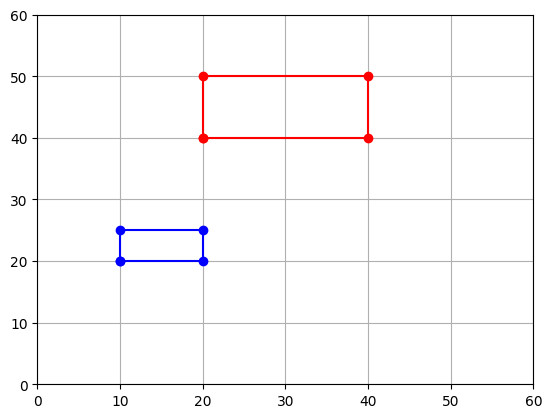

In [41]:
x_scaling = 2
y_scaling = 2

scaled_points = []

for point in points:
  scaled_points.append(scale_point(point[0], point[1], x_scaling, y_scaling))

plot_2d_shape(points, scaled_points, [0, 60], [0, 60])